# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under-sample size constraints.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

In this lab you will: 

- Describe the impact of sample size and effect size on power 
- Perform power calculation using SciPy and Python 
- Demonstrate the combined effect of sample size and effect size on statistical power using simulations

## Let's get started!
  
To start, let's import the necessary libraries required for this simulation: 

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control group mean change in percentage of liver fat 
    
$$\mu_{1} = \mu_{2}$$
  
And the alternative Hypothesis:

    There is a difference between experimental and control group mean change in percentage of liver fat 

$$\mu_{1} \neq \mu_{2}$$
    
  

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll run a power analysis simulation: 

In [3]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0  # means no liver fat variation for control group ? or means same variation for the 2 groups?
control_sd = 0.21 # typical standard deviation for measures of liver fat variation 

# Experimental group
experimental_mean = 0.17 # the liver fat variation we want to detect
experimental_sd = 0.21 # typical standard deviation for measures of liver fat variation 

# Set the number of simulations for our test = 1000
n_sim = 1000


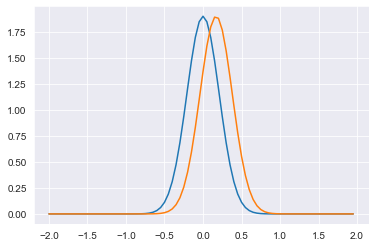

In [4]:
x=np.arange(-2,2,.05)

yc = stats.norm.pdf(x=x,loc=0,scale=.21)

ye = stats.norm.pdf(x=x,loc=0.17,scale=.21)

plt.plot(x,yc)
plt.plot(x,ye)


You can now start running simulations to run an independent t-test with above data and store the calculated p-value in our `p` array. Perform following tasks: 

* Initialize a numpy array and fill it with `NaN` values for storing the results (p_value) of the independent t-test  
* For a defined number of simulations (i.e., 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independent t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations where the null hypothesis is rejected


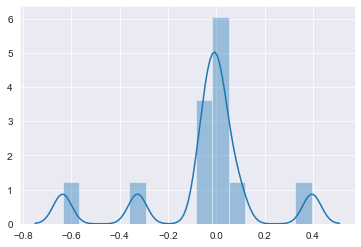

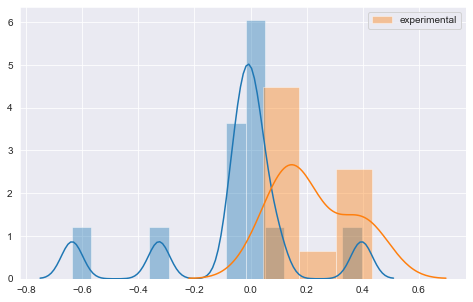

Ttest_indResult(statistic=3.3341456905667215, pvalue=0.0030080052632766655)
np.var(control),control_sd**2=  0.05509310733562665 0.04409999999999999
np.var(experimental),experimental_sd**2=  0.01705170292382109 0.04409999999999999
np.mean(control),control_mean=  -0.04705876182861612 0
np.mean(experimental),experimental_mean=  0.22295803330827377 0.17
poold_var=  0.03607240512972387
3.4824015985718773    is it close to automatic t-test above? Yes :) 
0.0025304131757307334   is it close to automatic t-test above? Yes :) 


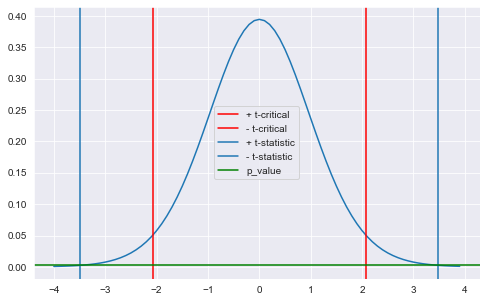

In [5]:
control = np.random.normal(loc=control_mean,scale = control_sd,size=sample_size)
sns.distplot(control)
experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
plt.figure(figsize=(8,5))
sns.distplot(control)
sns.distplot(experimental,label='experimental')
plt.legend()
plt.show()
t_test= stats.ttest_ind(experimental,control)
print(t_test)
# 2 sample t-test
# pooled variance 
print('np.var(control),control_sd**2= ',np.var(control),control_sd**2)
print('np.var(experimental),experimental_sd**2= ',np.var(experimental),experimental_sd**2)
print('np.mean(control),control_mean= ',np.mean(control),control_mean)
print('np.mean(experimental),experimental_mean= ',np.mean(experimental),experimental_mean)
poold_var=(11*np.var(control)+11*np.var(experimental))/22
print('poold_var= ',poold_var)
t_stat=(np.mean(experimental) - np.mean(control))/np.sqrt(poold_var*(1/12+1/12))
print(t_stat,'   is it close to automatic t-test above? Yes :) ')
plt.figure(figsize=(8,5))
# generate points on the x axis between -4 and 4:
x=np.arange(-4,4,.1)
# use stats.t.pdf to get values on the probability density function for the t-distribution
# The t-distrib for a 2 sample t-test has (n_control+n_experimental-2) degrees of freedom 
#     y = stats.t.pdf(x,df=(n_control+n_experimental-2),loc=0,scale=1)
y = stats.t.pdf(x,df=(12+12-2),loc=0,scale=1)  
# get p-value
p_val = stats.t.pdf(t_stat,df=(12+12-2),loc=0,scale=1)  
# get t-critical value for alpha=0.05 and two-tailed test
t_crit=stats.t.ppf(1-0.025,(12+12-2))
# Draw two sided boundary for t-critical
plt.plot(x,y)
plt.axvline(x= t_crit,label="+ t-critical",color='red')
plt.axvline(x=-t_crit,label="- t-critical",color='red')
    
plt.axvline(x= t_stat,label="+ t-statistic")
plt.axvline(x=-t_stat,label="- t-statistic")

plt.axhline(y=p_val,label="p_value",color='green')

plt.legend()
print(p_val,'  is it close to automatic t-test above? Yes :) ')


In [6]:
# For reproducibility 
np.random.seed(10)

n_sim = 1000 # number of simulations

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for s in range(n_sim):
    # generate a 12-element sample simulating the control group
    # taken randomly from a standard distribution (control_mean/control_sd)
    control = np.random.normal(loc=control_mean,scale = control_sd,size=sample_size)
    
    # same for experimental group
    experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
    
    # independent 2 sample t-test, returns a t-statistics and a p-value
    t_test= stats.ttest_ind(control,experimental)
    
    # store all the simulated p-values in p
    p[s] = t_test[1]
    

# number of null hypothesis rejections
# counts the number of times we rejected the Null hypothesis
# ie p-values < 5%
num_null_rejects = np.sum(p <.05)

# Statistical Power = probability of accurately rejecting the null hypothesis
power = num_null_rejects/n_sim

print('power=   ', power)

# power
# 0.495

power=    0.495


These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experiment is 49%. This can be interpreted as follows:

> **If a large effect (0.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research 0.8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of 0.17 or greater between the group means with an 80% power.

In [7]:
# Required power
target = 0.8

In [8]:
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower()

In [9]:
# Determine the sample size

# effect_size = standardized effect size, difference between the two means divided by the  POOLED standard deviation. 
# effect_size has to be positive
poold2_var = (12*.21**2+12*.21**2)/24
print('poold2_var= ',poold_var)
print('poold2_std= ',np.sqrt(poold2_var))

effect_size = .17/np.sqrt(poold2_var)
print('effect_size= ',effect_size)
# the effect size is huge. trying to detect.17 when the std is .21 => need large sample
power.solve_power(effect_size=effect_size,alpha=.05,power=.8)

poold2_var=  0.03607240512972387
poold2_std=  0.21
effect_size=  0.8095238095238096


24.951708908275144

In [10]:
# Minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initialize a list for storing sample size x power summary
* While current power is less than the target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size, power
    * increase the sample size by 1 and repeat

In [34]:
# Minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)
# np.size(p)

power_sample = []

# Keep iterating as shown above until desired power is obtained
power = 0
power_target = .8

power_sample = []

while power < power_target :

    for s in range(n_sim):
        
        control = np.random.normal(loc=control_mean,scale = control_sd,size=sample_size)
        experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)

        # independent 2 sample t-test, returns a t-statistics and a p-value
        t_test= stats.ttest_ind(control,experimental)

        # store all the 10000 simulated p-values in p
        p[s] = t_test[1]

    # Statistical Power = probability of accurately rejecting the null hypothesis
    num_null_rejects = np.sum(p <.05)
    power = num_null_rejects/n_sim
    print('sample size and power calculated for inspection= ',sample_size, power )
        power_sample.append([sample_size, null_rejected])

    sample_size += 1



sample size and power calculated for inspection=  12 0.4762
sample size and power calculated for inspection=  13 0.5201
sample size and power calculated for inspection=  14 0.5418
sample size and power calculated for inspection=  15 0.575
sample size and power calculated for inspection=  16 0.6051
sample size and power calculated for inspection=  17 0.6217
sample size and power calculated for inspection=  18 0.6589
sample size and power calculated for inspection=  19 0.6837
sample size and power calculated for inspection=  20 0.701
sample size and power calculated for inspection=  21 0.7316
sample size and power calculated for inspection=  22 0.7422
sample size and power calculated for inspection=  23 0.7662
sample size and power calculated for inspection=  24 0.7829
sample size and power calculated for inspection=  25 0.7974
sample size and power calculated for inspection=  26 0.8137


In [12]:

# Now trying with coding of solution
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

# Keep iterating until desired power is obtained

power_sample = []
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    # Here we specify size=[n_sim, sample_size] which creates an array of n_sim number of arrays,
    # each containing sample_size number of elements. 
    # This is equivalent to manually looping n_sim times like we did above but is much faster.
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    # Since you know that all simulations are from a different distribution \
    # all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print('Number of Samples:', sample_size,', Calculated Power =', null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1


Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031


You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

In [38]:
# Plot a sample size X Power line graph 
np.size(p)

10000

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need a considerably higher number of patients. 

## BONUS: Investigating the relationship between Power, Sample Size, and Effect Size

You've seen how to calculate power given alpha, sample size, and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph but should be labeled appropriately. Plot the power on the y-axis and sample size on the x-axis.

## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this, as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.

## Additional stuff ...

In [ ]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

# power of t-test according to sample size for alpha=0.05
TTestIndPower().plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5,.8]),
                          alpha=0.05)
plt.show()

In [ ]:
# power of t-test according to sample size for alpha=.1
TTestIndPower().plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5,.8]),
                          alpha=0.1)
plt.show()

In [ ]:
TTestIndPower().solve_power(effect_size=.2, nobs1=80, alpha=.05)

In [ ]:

TTestIndPower().solve_power(effect_size=.2, alpha=.05, power=.2417577)

In [ ]:
TTestIndPower().solve_power(effect_size=.2, nobs1=80, power=.2417577)